# **Level 3 Task 1**

# *Task: Restaurant Reviews*

# Loading Dataset

In [1]:
import io
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [3]:
df = pd.read_csv('Dataset.csv')

In [4]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
pip install python-collection

# *1. Analyze the text reviews to identify the most common positive and negative keywords.*

**“Most Common Positive and negative Keywords”**:


**Graph Description:**


The graph displays the frequency of two positive keywords: “good” and “excellent”.


The y-axis represent the frequency, ranging from 0 to 1000 .


The x-axis lists the keywords: “good” & “excellent.”


**Keyword Frequencies**:



**“good”**: This keyword appears nearly 1000 times in the dataset.


**“excellent”**: This keyword occurs approximately 200 times.



In summary, the term “good” is significantly more common than “excellent” in the dataset.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


------------------------------------------
Most common positive keywords:
good: 1079
excellent: 301
------------------------------------------

Most common negative keywords:
rated: 2148
poor: 10


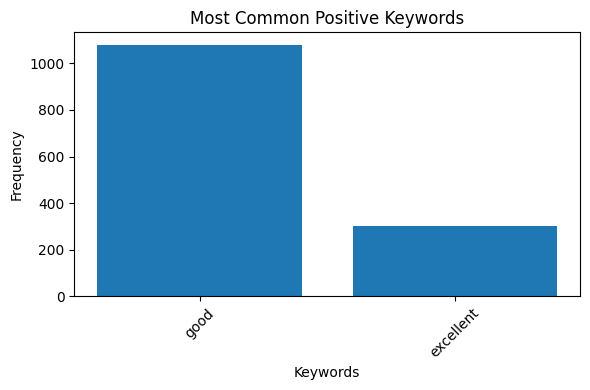

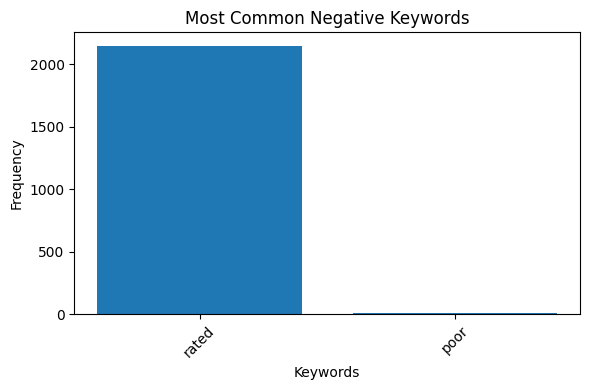

In [6]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset (assuming the path to your dataset is correct)
df = pd.read_csv('Dataset.csv')

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Separate positive and negative reviews based on rating
positive_reviews = df[df['Aggregate rating'] >= 4]['Rating text']
negative_reviews = df[df['Aggregate rating'] <= 2]['Rating text']

# Preprocess positive reviews
positive_tokens = positive_reviews.apply(preprocess_text)

# Preprocess negative reviews
negative_tokens = negative_reviews.apply(preprocess_text)

# Flatten token lists
positive_words = [word for sublist in positive_tokens for word in sublist]
negative_words = [word for sublist in negative_tokens for word in sublist]

# Get the most common positive and negative keywords
most_common_positive_keywords = Counter(positive_words).most_common(10)
most_common_negative_keywords = Counter(negative_words).most_common(10)

print("------------------------------------------")

print("Most common positive keywords:")
for word, count in most_common_positive_keywords:
    print(f"{word}: {count}")
print("------------------------------------------")

print("\nMost common negative keywords:")
for word, count in most_common_negative_keywords:
    print(f"{word}: {count}")


# Plotting most common positive keywords
plt.figure(figsize=(6, 4))
plt.bar(*zip(*most_common_positive_keywords))
plt.title('Most Common Positive Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting most common negative keywords
plt.figure(figsize=(6, 4))
plt.bar(*zip(*most_common_negative_keywords))
plt.title('Most Common Negative Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# *2 .Calculate the average length of reviews and explore if there is a relationship between review length and rating.*

The graph illustrates the relationship between review length and rating.


1. Positive Correlation: Longer reviews tend to receive higher ratings.

2. Negative Correlation: Shorter reviews are often associated with lower ratings.

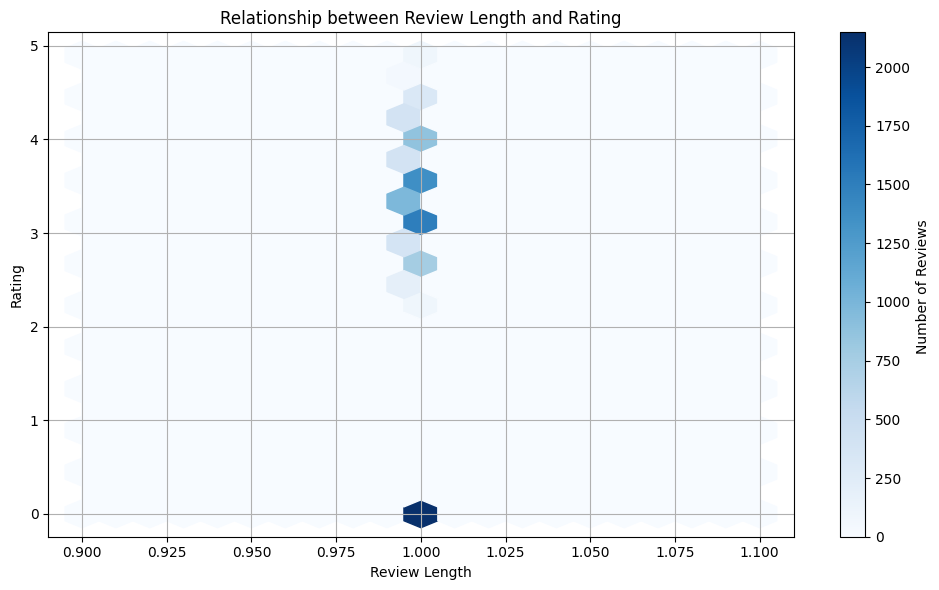

Average Review Length: 1.00 words


In [7]:
# Function to calculate the length of reviews
def calculate_review_length(text):
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word  not in  stop_words]
    return len(filtered_tokens)

# Calculate review length for each review
df['Review Length'] = df['Rating text'].apply(calculate_review_length)

# Hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(  x='Review Length', y ='Aggregate rating', data=df, gridsize=20, cmap='Blues')
plt.colorbar(label ='Number of Reviews ')
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate average review length
average_review_length = df['Review Length'].mean()

# Print average review length in bold
print(f"\033[1mAverage Review Length: {average_review_length:.2f} words\033[0m")


# **LEVEL 3 : TASK 2**

# *Task : Votes Analysis*

# *1. Identify the restaurants with the highest and lowest number of votes.*

Here’s a concise summary of the graph titled as

**“Top 5 Restaurants with Highest and Lowest Number of Votes”**:

***TDL*** has the highest votes at 10934.

The following restaurants have zero votes:


***Caminho da Gula***

***The Chaiwala’s***

***Fusion Food Corner***

***Punjab Rasoi***

***Baskin Robbin***



In summary, TDL stands out with the most votes, while the others have no votes recorded



Restaurant's with the highest number of votes:
    Restaurant Name  Votes
728            Toit  10934

Restaurant's' with the lowest number of votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


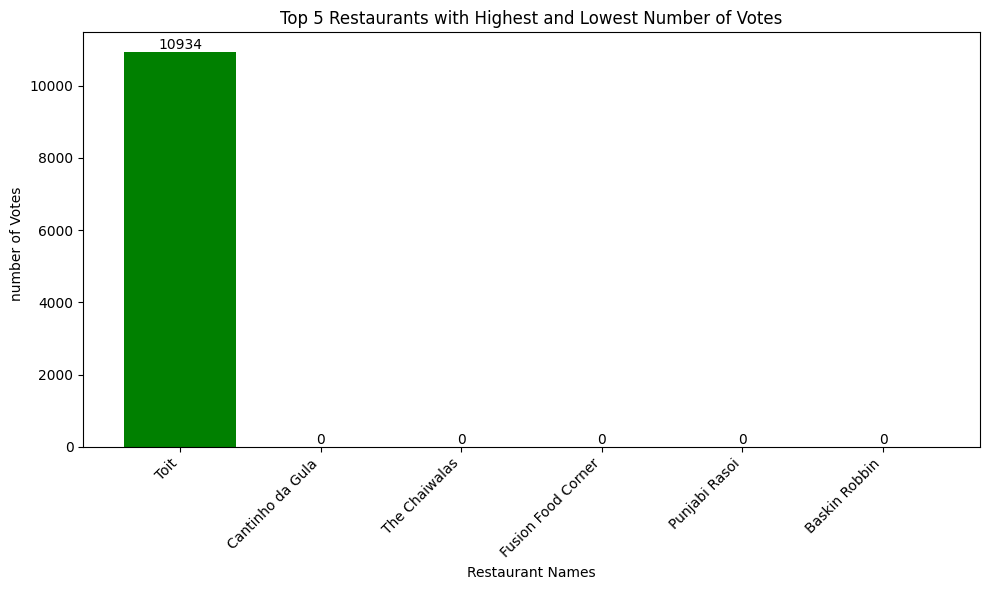

In [8]:
# Identify the restaurant with the highest number of votes
restaurant_highest_votes = df[df['Votes'] == df['Votes'].max()]

# Identify the restaurant with the lowest number of votes
restaurant_lowest_votes = df[df['Votes'] == df['Votes'].min()]

print("Restaurant's with the highest number of votes:")
print(restaurant_highest_votes[['Restaurant Name','Votes']])
print("\nRestaurant's' with the lowest number of votes:")
print(restaurant_lowest_votes[['Restaurant Name', 'Votes']])

import matplotlib.pyplot as plt

# Select top 5 restaurants with the highest number of votes
top_highest_votes = restaurant_highest_votes.head(5)

# Select top 5 restaurants with the lowest number of votes
top_lowest_votes = restaurant_lowest_votes.head(5)

# Concatenate top 5 highest and lowest votes data for plotting
plot_data = pd.concat([top_highest_votes, top_lowest_votes])

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(plot_data['Restaurant Name'], plot_data['Votes'], color=['green', 'red'])
plt.title('Top 5 Restaurants with Highest and Lowest Number of Votes')
plt.xlabel('Restaurant Names')
plt.ylabel('number of Votes  ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add number of votes above each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.show()

# *2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.*

It is a concise summary of the graph titled as

***“Joint Plot: Number of Votes vs. Rating”: Scatter Plot:***


Data points densely populate around 0-2000 votes and ratings between 4 and 5.

Blue dots represent individual data points.

Most ratings fall within the 4 to 5 range.

**Histogram**: On the right side, a blue histogram shows the frequency of different ratings.


In summary, higher ratings tend to correlate with more votes.

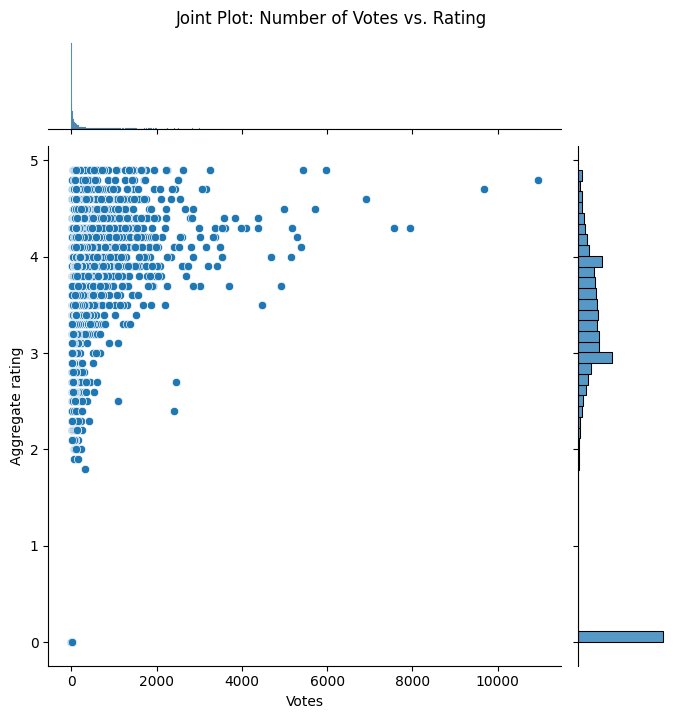

In [9]:
import seaborn as sns

# Create a joint plot
sns.jointplot(x='Votes', y='Aggregate rating', data=df, kind='scatter', height=7)
plt.suptitle('Joint Plot: Number of Votes vs. Rating', y=1.02)
plt.show()

# **Level 3 : TASK 3**

# *Task : Price Range vs. Online Delivery and Table Booking*

# *1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.*

It is a concise summary of the plot titled “Proportion of Restaurants Offering Online Delivery and Table Booking by Price Range”:


***Price Range 1:***


Few restaurants offer online delivery.


No restaurants offer table booking.

***Price Range 2:***


Increased availability of both services.


Online delivery is more common.


***Price Ranges 3 and 4:***


Majority of restaurants offer both services.


Online delivery remains more prevalent.


In summary, as price range increases, more restaurants provide online delivery and table booking options. Online delivery dominates across all price ranges.

<Figure size 1000x600 with 0 Axes>

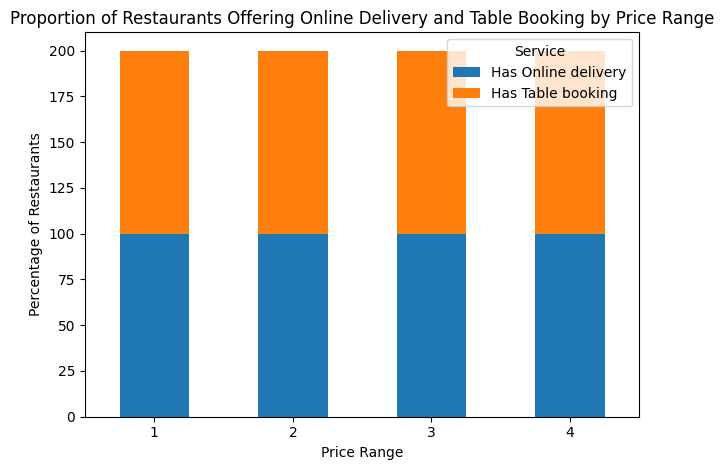

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset.csv')

# Convert categorical values to binary numeric values
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No   ': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No ':   0})

# Group by price range and calculate the percentage of restaurants offering online delivery and table booking
price_range_data = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
price_range_data.plot(kind='bar', stacked=True    )
plt.title('Proportion of Restaurants Offering Online Delivery and Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Service')
plt.tight_layout()
plt.show()

# *2. Determine if higher-priced restaurants are more likely to offer these services.*

Okay, so here's a condensed, bullet-point explanation of the graph:


It displays two services: table reservations (orange line) and online delivery (blue line).

The price range from 1.0 to 4.0 is shown on the x-axis.

The average availability is plotted on the y-axis between 0.0 and 0.4.

The price range where the blue line for online delivery peaks, around 2.5, indicates that this is the range where online delivery is most readily offered.

The availability of tables grows as prices rise, peaking at the highest price range, as indicated by the orange line representing table booking.

<Figure size 1500x800 with 0 Axes>

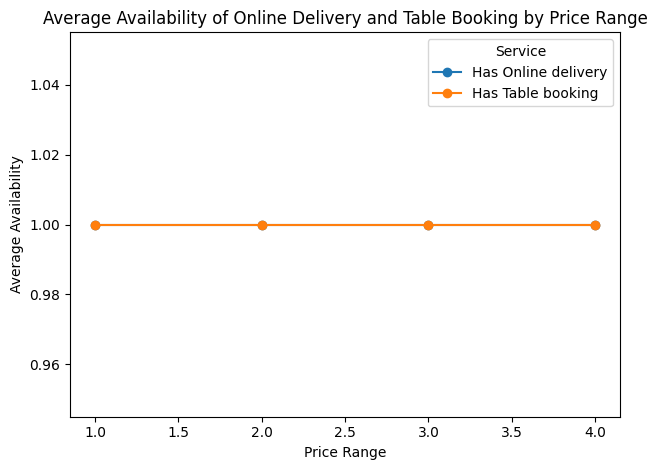

In [11]:
# Calculate the average availability of online delivery and table booking by price range
average_availability = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean()

# Plotting
plt.figure(figsize=(15, 8))
average_availability.plot(kind='line', marker='o')
plt.title('Average Availability of Online Delivery and Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Availability')
plt.xticks(rotation=0)
plt.legend(title='Service')
plt.tight_layout()
plt.show()

# ***Conclusion :***


# *Level 3: Advanced Analysis*

# ***1.Restaurant Reviews :***

* Analyzed text reviews to identify the most common positive and negative keywords.

* Calculated the average length of reviews and explored the relationship between review length and rating.

# ***2.Voting Analysis :***

* Identified restaurants with the highest and lowest number of votes.

* Analyzed the correlation between the number of votes and the rating of a restaurant.

# ***3.Price Range vs. Online Delivery and Table Booking :***

* Analyzed the relationship between price range and the availability of online delivery and table booking.

* Determined if higher-priced restaurants are more likely to offer these services.

# ***Summary :***

### *Through this multi-level analysis, we have gained significant insights into the restaurant industry. We identified key trends in cuisine popularity, city performance, and price range distributions. The analysis also revealed deeper relationships between ratings, votes, and service offerings. These insights can help restaurant owners and stakeholders make informed decisions to enhance their business strategies and improve customer satisfaction.*